## GRIPS charge sharing measurements
### Analyze .dat files from individual preamp readout

#### Import sdpp.py to parse the .dat files and other useful things

In [1]:
#%matplotlib notebook
from sdpp import read
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import linregress
plt.style.use('jacqueline')

### Paths to data
### Thresholds: ch0 = 150, ch1 = 150, ch2 = 150, ch3 = 100 
### Vertical scale: of +/-100 mV, DC offset of 0.090 V
### Reading out DC strips with the sources on DC side

#### Read data into multi-dimensional numpy arrays via sdpp.py

In [2]:
# Am-241
path_Am241 = "/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/211102_Am241_DCside/"
data_ch0,metadata_ch0 = read(path_Am241+"crrc6.uuXt.dat")
data_ch1,metadata_ch1 = read(path_Am241+"crrc6.ZwUz.dat")
data_ch2,metadata_ch2 = read(path_Am241+"crrc6.ssKw.dat")
data_ch3,metadata_ch3 = read(path_Am241+"crrc6.1aIB.dat")

# Took more data on 21/11/10
data_ch0_1,metadata_ch0_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.2K85.dat")
data_ch1_1,metadata_ch1_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.2l5R.dat")
data_ch2_1,metadata_ch2_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.H8i9.dat")
data_ch3_1,metadata_ch3_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.EdwL.dat")

format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth'

In [3]:
# Co-57
path_Co57 = "/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/211102_Co57_DCside/"
data_Co57_ch0,metadata_Co57_ch0 = read(path_Co57+"crrc6.egj7.dat")
data_Co57_ch1,metadata_Co57_ch1 = read(path_Co57+"crrc6.4NLp.dat")
data_Co57_ch2,metadata_Co57_ch2 = read(path_Co57+"crrc6.Zuc6.dat")
data_Co57_ch3,metadata_Co57_ch3 = read(path_Co57+"crrc6.FMtR.dat")

# Took more data on 21/11/10
data_Co57_ch0_1,metadata_Co57_ch0_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.AavP.dat")
data_Co57_ch1_1,metadata_Co57_ch1_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.Yy6C.dat")
data_Co57_ch2_1,metadata_Co57_ch2_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.98Bc.dat")
data_Co57_ch3_1,metadata_Co57_ch3_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.JEFi.dat")

format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth'

In [4]:
# Cs-137
path_Cs137 = "/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/211029_Cs137_DCside/"
data_Cs137_ch0,metadata_Cs137_ch0 = read(path_Cs137+"crrc6.00Vs.dat")
data_Cs137_ch1,metadata_Cs137_ch1 = read(path_Cs137+"crrc6.joun.dat")
data_Cs137_ch2,metadata_Cs137_ch2 = read(path_Cs137+"crrc6.xCb7.dat")
data_Cs137_ch3,metadata_Cs137_ch3 = read(path_Cs137+"crrc6.1v7h.dat")

# Took more data on 21/11/10
data_Cs137_ch0_1,metadata_Cs137_ch0_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.CEwr.dat")
data_Cs137_ch1_1,metadata_Cs137_ch1_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.hvjP.dat")
data_Cs137_ch2_1,metadata_Cs137_ch2_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.togX.dat")
data_Cs137_ch3_1,metadata_Cs137_ch3_1 = read("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/data/crrc6.W3lC.dat")

format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth': 8, 'shaper_npoints': 32, 'timestep': 32.0, 'vertical': 3.0757874015748035e-06, 'offset': 0.09, 'rcpole': 0.9809825673534073, 'crzero': 0.9999507704425739, 'hpfpole': 0.9999798940091446, 'gain': -6.182320465543761}
format identifier: 0x7c2b9a9f
{'format_id': 2083232415, 'raw_npoints': 2048, 'bit_depth'

### What do we have here

In [5]:
print("Number of samples, ch0:",data_ch0.shape)
print("Number of samples, ch1:",data_ch1.shape)
print("Number of samples, ch2:",data_ch2.shape)
print("Number of samples, ch3:",data_ch3.shape)

Number of samples, ch0: (63635,)
Number of samples, ch1: (62804,)
Number of samples, ch2: (62464,)
Number of samples, ch3: (63502,)


#### The chX_data arrays have several attributes,

In [6]:
# time is an integer
# amplitude is a floating point number

time_ch0 = data_ch0["time"]
amplitude_ch0 = data_ch0["amplitude"]
waveform_ch0 = data_ch0["waveform"]

In [7]:
time_ch1 = data_ch1["time"]
amplitude_ch1 = data_ch1["amplitude"]
waveform_ch1 = data_ch1["waveform"]

In [8]:
time_ch2 = data_ch2["time"]
amplitude_ch2 = data_ch2["amplitude"]
waveform_ch2 = data_ch2["waveform"]

In [9]:
time_ch3 = data_ch3["time"]
amplitude_ch3 = data_ch3["amplitude"]
waveform_ch3 = data_ch3["waveform"]

#### and the chX_metadata arrays have useful info as well.

In [10]:
metadata_ch0.keys()

dict_keys(['format_id', 'raw_npoints', 'bit_depth', 'shaper_npoints', 'timestep', 'vertical', 'offset', 'rcpole', 'crzero', 'hpfpole', 'gain'])

### Plot some sanity checks

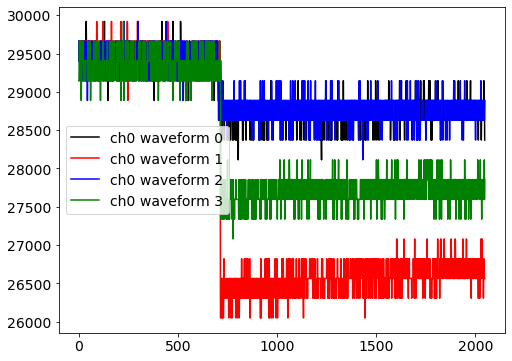

In [11]:
# Plot a couple waveform to check things out.
# Looks like a waveform. Good.
plt.figure()
for i in range(4):
    plt.plot(waveform_ch0[i],label="ch0 waveform {}".format(i))
plt.legend();

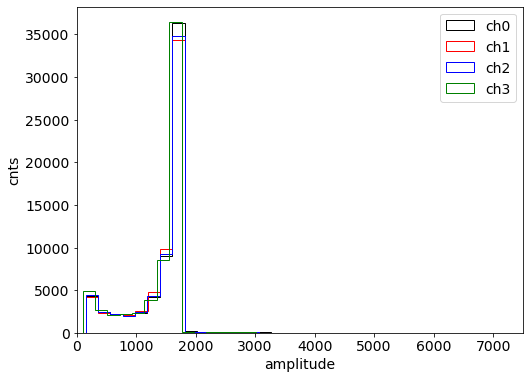

In [12]:
# Obviously not too visually useful, but looks like Am-241. Good.
plt.figure()
hist_ch0, binedges_ch0, _ = plt.hist(amplitude_ch0,bins=300,histtype="step",label="ch0")
hist_ch1, binedges_ch1, _ = plt.hist(amplitude_ch1,bins=300,histtype="step",label="ch1")
hist_ch2, binedges_ch2, _ = plt.hist(amplitude_ch2,bins=300,histtype="step",label="ch2")
hist_ch3, binedges_ch3, _ = plt.hist(amplitude_ch3,bins=300,histtype="step",label="ch3")
plt.xlabel("amplitude");plt.ylabel("cnts")
plt.xlim(0,7500)
plt.legend();

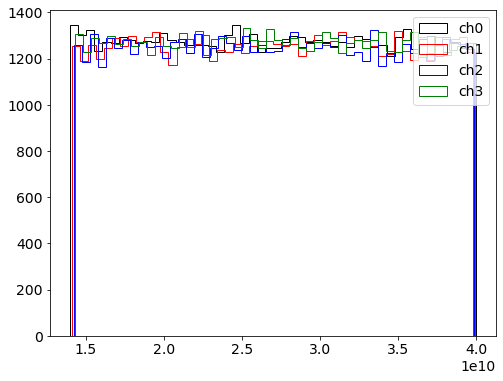

In [13]:
plt.figure()
plt.hist(time_ch0,histtype="step",bins=50,label="ch0")
plt.hist(time_ch1,histtype="step",bins=50,label="ch1")
plt.hist(time_ch2,histtype="step",bins=50,label="ch2")
plt.hist(time_ch3,histtype="step",bins=50,label="ch3")
plt.legend();

### Want to look at data across the channels that is coincident in time

In [14]:
def prep_array(arr,ch):
    """Take numpy array from sdpp.read and add a column to it
    which holds the channel number."""
    
    dt = [('channel','i4'),('amplitude','f8'),('time','u8')]
    a = np.zeros(arr.shape,dtype=dt)
    a['amplitude'] = arr['amplitude']
    a['time'] = arr['time']
    a['channel'] = ch
    return a

#### Add the channel column to the arrays, concatenate them, and then sort by timestamp

In [15]:
# Am-241
data_ch0 = prep_array(data_ch0,0)
data_ch1 = prep_array(data_ch1,1)
data_ch2 = prep_array(data_ch2,2)
data_ch3 = prep_array(data_ch3,3)

data_ch0_1 = prep_array(data_ch0_1,0)
data_ch1_1 = prep_array(data_ch1_1,1)
data_ch2_1 = prep_array(data_ch2_1,2)
data_ch3_1 = prep_array(data_ch3_1,3)

#data = np.concatenate([data_ch0,data_ch1,data_ch2,data_ch3])
data = np.concatenate([data_ch0,data_ch0_1,data_ch1,data_ch1_1,data_ch2,data_ch2_1,data_ch3,data_ch3_1])
data.sort(order='time')

In [16]:
# Co-57
data_Co57_ch0 = prep_array(data_Co57_ch0,0)
data_Co57_ch1 = prep_array(data_Co57_ch1,1)
data_Co57_ch2 = prep_array(data_Co57_ch2,2)
data_Co57_ch3 = prep_array(data_Co57_ch3,3)

data_Co57_ch0_1 = prep_array(data_Co57_ch0_1,0)
data_Co57_ch1_1 = prep_array(data_Co57_ch1_1,1)
data_Co57_ch2_1 = prep_array(data_Co57_ch2_1,2)
data_Co57_ch3_1 = prep_array(data_Co57_ch3_1,3)

#data_Co57 = np.concatenate([data_Co57_ch0,data_Co57_ch1,data_Co57_ch2,data_Co57_ch3])
data_Co57 = np.concatenate([data_Co57_ch0,data_Co57_ch0_1,data_Co57_ch1,data_Co57_ch1_1,data_Co57_ch2,data_Co57_ch2_1,data_Co57_ch3,data_Co57_ch3_1])
data_Co57.sort(order='time')

In [17]:
# Cs-137
data_Cs137_ch0 = prep_array(data_Cs137_ch0,0)
data_Cs137_ch1 = prep_array(data_Cs137_ch1,1)
data_Cs137_ch2 = prep_array(data_Cs137_ch2,2)
data_Cs137_ch3 = prep_array(data_Cs137_ch3,3)

data_Cs137_ch0_1 = prep_array(data_Cs137_ch0_1,0)
data_Cs137_ch1_1 = prep_array(data_Cs137_ch1_1,1)
data_Cs137_ch2_1 = prep_array(data_Cs137_ch2_1,2)
data_Cs137_ch3_1 = prep_array(data_Cs137_ch3_1,3)

#data_Cs137 = np.concatenate([data_Cs137_ch0,data_Cs137_ch1,data_Cs137_ch2,data_Cs137_ch3])
data_Cs137 = np.concatenate([data_Cs137_ch0,data_Cs137_ch0_1,data_Cs137_ch1,data_Cs137_ch1_1,data_Cs137_ch2,data_Cs137_ch2_1,data_Cs137_ch3,data_Cs137_ch3_1])
data_Cs137.sort(order='time')

In [18]:
# Take a look at a few events. need to jump into the array a bit since channels were started at different times
#s = 20000
#q = 128
#data[s:s+q]

In [19]:
# This function returns a list, where each element of the list is a list of coincident events
#  Default coincidence window is 10 samples
def group_events(data,window=10):
    grouped_events = []
    event = [data[0]]
    for x in data[1:]:
        if x['time'] - event[0]['time'] > window:
            # to keep single-site events, comment out this if statement
            #if len(event) > 1:
            grouped_events.append(event)
            event = [x]
        else:
            event.append(x)
    return grouped_events

In [20]:
events = group_events(data)
events_Co57 = group_events(data_Co57)
events_Cs137 = group_events(data_Cs137)

In [21]:
# Take a look at some 3 strip events
# count = 0
# for event in events:
#     if len(event) == 3:
#         print(event)
#         count += 1
#         if count >= 32:
#             break

In [22]:
def group_by_num_strips(events):
    """Group all events by the number of strips they triggered, 
    i.e. as 1-,2-,3-,or 4-site events.
    Arg: events returned by group_events
    Returns: lists of events which triggered each type:
             events_1strip,events_2strips,events_3strip,events_4strip"""
    
    events_1strip = []
    events_2strip = []
    events_3strip = []
    events_4strip = []

    for i in range(len(events)):
        event = events[i]
        #print(len(event))
        if len(event) == 1:
            events_1strip.append(event)
        elif len(event) == 2:
            events_2strip.append(event)
        elif len(event) == 3:
            events_3strip.append(event)
        elif len(event) == 4:
            events_4strip.append(event)
        else:
            print("Event not on 1, 2, 3, or 4 strips? i:",i," Event:",event)
          
    return events_1strip,events_2strip,events_3strip,events_4strip

In [23]:
def plot_num_hit_strips(events_list,sources):
    """Plot the number of events which are 1-site, 2-site, etc.
    Currently hard-coded for 4 channels.
    Args:
        events: list of events returned by group_events  ex) [events_Co57,events_Cs137]
        sources: list of sources corresponding to each list in "events" ex) ["Co-57","Cs-137"]
    Returns:
        -raw number and percentage of total events per x-site type
        -bar graph showing the distribution"""
    
    width = 0
    num_strips = np.array([1,2,3,4])
    plt.figure(figsize=(8,6))
    
    for i in range(len(events_list)):
        events = events_list[i]

        events_1strip,events_2strip,events_3strip,events_4strip = group_by_num_strips(events)
        num_events_1strip = len(events_1strip)
        num_events_2strip = len(events_2strip)
        num_events_3strip = len(events_3strip)
        num_events_4strip = len(events_4strip)

        num_events = [num_events_1strip,num_events_2strip,num_events_3strip,num_events_4strip]

        perc_events = np.round(100.*np.array(num_events)/np.sum(num_events),1)

        # Plot
        bars = plt.bar(num_strips+width,perc_events,0.25,label=sources[i])
        plt.xlabel("Number of strips")#,fontsize=12)
        plt.xticks(num_strips)#,fontsize=12)
        #plt.yticks(fontsize=12)
        plt.ylabel("Percent of all events")#,fontsize=12)
        #plt.title("Source on DC side",fontsize=12)
        plt.legend()#fontsize=12);

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x(), yval + 1, yval,fontsize=12)
            
        width += 0.25

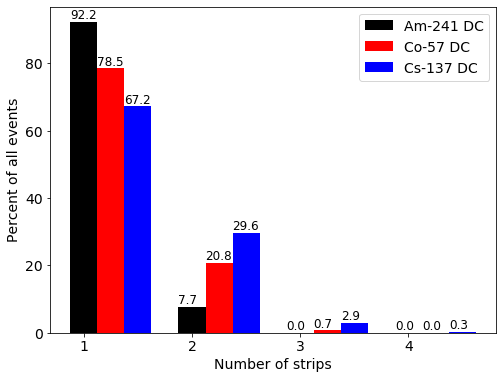

In [24]:
# Some shared charge may not be charge sharing, but instead it could just be compton scattering
# Not as much compton scattering with Am-241
# Could try to make a similar plot with the Maxwell simulations
plot = plot_num_hit_strips([events,events_Co57,events_Cs137],["Am-241 DC","Co-57 DC","Cs-137 DC"])
#plt.savefig("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/num_hit_strips_DC.pdf")

## Energy calibration

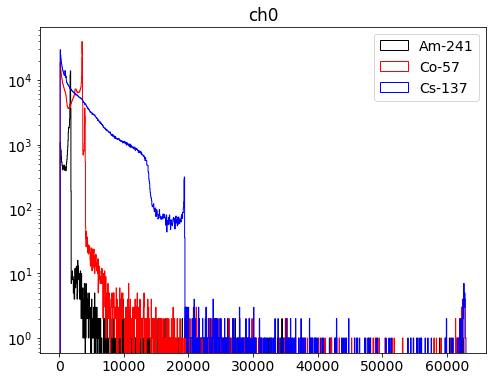

In [25]:
plt.figure(figsize=(8,6))
plt.hist([x[1] for x in data_ch0],bins=1500,histtype="step",label="Am-241")
plt.hist([x[1] for x in data_Co57_ch0],bins=1500,histtype="step",label="Co-57")
plt.hist([x[1] for x in data_Cs137_ch0],bins=1200,histtype="step",label="Cs-137")
plt.legend()
plt.yscale('log')
plt.title("ch0");

In [26]:
# use cursor to find x-location of photopeaks
am241_59keV = 1732.36
co57_122keV = 3547.43
co57_136keV = 3964.78
cs137_662keV = 19368

In [27]:
# linear fit ecal
y = np.array([59.5,122.1,136.5,661.7])
x_ch0 = np.array([am241_59keV,co57_122keV,co57_136keV,cs137_662keV])

# perform linear fit
fit_ch0 = linregress(x_ch0, y)

In [28]:
# plt.figure(figsize=(8,6))
# plt.hist([x[1] for x in data_ch1],bins=1500,histtype="step",label="Am-241")
# plt.hist([x[1] for x in data_Co57_ch1],bins=1500,histtype="step",label="Co-57")
# plt.hist([x[1] for x in data_Cs137_ch1],bins=1200,histtype="step",label="Cs-137")
# plt.legend()
# plt.yscale('log')
# plt.title("ch1");

In [29]:
# use cursor to find x-location of photopeaks
am241_59keV_ch1 = 1716.52
co57_122keV_ch1 = 3520.12
co57_136keV_ch1 = 3939.24
cs137_662keV_ch1 = 19118.4

# linear fit ecal
x_ch1 = np.array([am241_59keV_ch1,co57_122keV_ch1,co57_136keV_ch1,cs137_662keV_ch1])

# perform linear fit
fit_ch1 = linregress(x_ch1, y)

In [30]:
# plt.figure(figsize=(8,6))
# plt.hist([x[1] for x in data_ch2],bins=1500,histtype="step",label="Am-241")
# plt.hist([x[1] for x in data_Co57_ch2],bins=1500,histtype="step",label="Co-57")
# plt.hist([x[1] for x in data_Cs137_ch2],bins=1200,histtype="step",label="Cs-137")
# plt.legend()
# plt.yscale('log')
# plt.title("ch2");

In [31]:
# use cursor to find x-location of photopeaks
am241_59keV_ch2 = 1710.07
co57_122keV_ch2 = 3522.52
co57_136keV_ch2 = 3938.38
cs137_662keV_ch2 = 19250.3

# linear fit ecal
x_ch2 = np.array([am241_59keV_ch2,co57_122keV_ch2,co57_136keV_ch2,cs137_662keV_ch2])

# perform linear fit
fit_ch2 = linregress(x_ch2, y)

In [32]:
# plt.figure(figsize=(8,6))
# plt.hist([x[1] for x in data_ch3],bins=1500,histtype="step",label="Am-241")
# plt.hist([x[1] for x in data_Co57_ch3],bins=1500,histtype="step",label="Co-57")
# plt.hist([x[1] for x in data_Cs137_ch3],bins=1200,histtype="step",label="Cs-137")
# plt.legend()
# plt.yscale('log')
# plt.title("ch3");

In [33]:
# use cursor to find x-location of photopeaks
am241_59keV_ch3 = 1703.7
co57_122keV_ch3 = 3508.54
co57_136keV_ch3 = 3926.36
cs137_662keV_ch3 = 19022.6

# linear fit ecal
x_ch3 = np.array([am241_59keV_ch3,co57_122keV_ch3,co57_136keV_ch3,cs137_662keV_ch3])

# perform linear fit
fit_ch3 = linregress(x_ch3, y)

In [34]:
# xarr = np.arange(0,30000,1) # amplitude

# # Plot a channel to show linearity (by eye)
# plt.figure()
# plt.plot(x_ch0, y, 'ko', label='original data')
# plt.plot(xarr, fit_ch0.intercept + fit_ch0.slope*xarr, 'r', label='fitted line')
# plt.ylabel('Energy [keV]')
# plt.xlabel('amplitude')
# plt.title('ch0')
# plt.legend();

# Plot all channels if you want
# fig, axs = plt.subplots(2, 2)

# axs[0,0].plot(x_ch0, y, 'ko', label='original data')
# axs[0,0].plot(xarr, fit_ch0.intercept + fit_ch0.slope*xarr, 'r', label='fitted line')
# axs[0,0].set_ylabel('Energy [keV]')
# axs[0,0].set_xlabel('amplitude')
# axs[0,0].set_title('ch0')
# axs[0,0].legend();

# axs[0,1].plot(x_ch1, y, 'ko', label='original data')
# axs[0,1].plot(xarr, fit_ch1.intercept + fit_ch1.slope*xarr, 'r', label='fitted line')
# axs[0,1].set_ylabel('Energy [keV]')
# axs[0,1].set_xlabel('amplitude')
# axs[0,1].set_title('ch1')
# axs[0,1].legend();

# axs[1,0].plot(x_ch2, y_, 'ko', label='original data')
# axs[1,0].plot(xarr, fit_ch2.intercept + fit_ch2.slope*xarr, 'r', label='fitted line')
# axs[1,0].set_ylabel('Energy [keV]')
# axs[1,0].set_xlabel('amplitude')
# axs[1,0].set_title('ch2')
# axs[1,0].legend();

# axs[1,1].plot(x_ch3, y, 'ko', label='original data')
# axs[1,1].plot(xarr, fit_ch3.intercept + fit_ch3.slope*xarr, 'r', label='fitted line')
# axs[1,1].set_ylabel('Energy [keV]')
# axs[1,1].set_xlabel('amplitude')
# axs[1,1].set_title('ch3')
# axs[1,1].legend();


In [35]:
# fig, ax1 = plt.subplots()
# channels = [0,1,2,3]

# slopes = [fit_ch0.slope,fit_ch1.slope,fit_ch2.slope,fit_ch3.slope]
# slopes_stderr = [fit_ch0.stderr,fit_ch1.stderr,fit_ch2.stderr,fit_ch3.stderr]

# intercepts = [fit_ch0.intercept,fit_ch1.intercept,fit_ch2.intercept,fit_ch3.intercept]
# # need to upgrade scipy version for this...
# #intercepts_stderr = [fit.intercept_stderr,fit_ch1.intercept_stderr,fit_ch2.intercept_stderr,fit_ch3.intercept_stderr]

# ax1.errorbar(channels,slopes,yerr=slopes_stderr,color="k",fmt=".")

# ax2 = ax1.twinx()
# ax2.plot(channels,intercepts,'b.')

# ax1.set_xlabel('Channel')
# ax1.set_xticks(channels)
# ax1.set_ylabel('slope', color='k')
# ax2.set_ylabel('intercept', color='b')
# ax2.tick_params(axis='y', colors='b')

# why non-zero intercept? a small baseline shift? systematic error from visual calibration?

In [36]:
# Define array with energy calibrations
#ecal = [[fit_ch0.intercept,fit_ch0.slope],[fit_ch1.intercept,fit_ch1.slope],[fit_ch2.intercept,fit_ch2.slope],[fit_ch3.intercept,fit_ch3.slope]]

# 11/8/21: using ecal values from melinator
def read_ecal(ecals):
    path = "/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/energy_calibration/"
    fit_params = []
    for ecal in ecals:
        for line in open(path+ecal,"r").readlines():
            if line.startswith("CM"):
                fit_params.append([float(line.split()[6]),float(line.split()[7])])
    return fit_params

ecal = read_ecal(["grips_DC_ch0_poly1.ecal","grips_DC_ch1_poly1.ecal","grips_DC_ch2_poly1.ecal","grips_DC_ch3_poly1.ecal"])

In [37]:
# In each event, convert amplitudes to energy in keV
def amp_to_keV(events,ecal):
    energies = []
    cnt = 0

    for event in events:
       
        # Record energy in each channel
        ch_energies = np.zeros(4)

        for hit in event:
            ch = hit[0]
            #print(ch,ecal[ch][0],ecal[ch][1],hit[1])
            
            e = ecal[ch][0] + ecal[ch][1]*hit[1]
            ch_energies[ch] = e

        energies.append(ch_energies)
        cnt += 1
    #     if cnt > 10:
    #         break
    return energies

### Plot chX + chY versus chY energy

In [38]:
# first, consider ch1 and ch2 (the middle two channels to avoid edge effect complications)
sum_list = []
single_list = []

energies = amp_to_keV(events,ecal)

for event in energies:
    if event[0] == 0. and event[3] == 0.:
        summed = np.sum(event)

#        # Select photopeak only
#         if not (summed >= 55 and summed <= 64):
#             continue

        sum_list.append(summed)
        single_list.append(event[2])

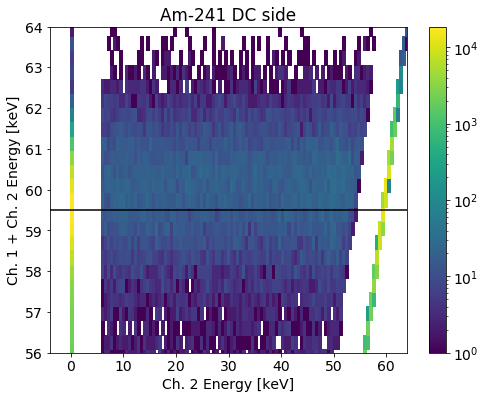

In [42]:
plt.figure()
#plt.scatter(single_list,sum_list)
# plt.hist2d(single_list, sum_list, bins=(3000,11000), norm=mpl.colors.LogNorm(),cmap=plt.cm.viridis)
plt.hist2d(single_list, sum_list, bins=(3000,6000), norm=mpl.colors.LogNorm(),cmap=plt.cm.viridis)
cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=12)
plt.xlim(-4,64)
plt.ylim(56,64)
plt.axhline(y=59.5,color="k")
plt.title("Am-241 DC side")#,fontsize=12)
plt.xlabel('Ch. 2 Energy [keV]')#,fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.ylabel('Ch. 1 + Ch. 2 Energy [keV]')#,fontsize=12);

plt.savefig("/volumes/eos/users/jacqueline/analysis/grips_charge_sharing/ch1_ch2_hist_Am241_DC.pdf")

In [116]:
# first, consider ch1 and ch2 (the middle two channels to avoid edge effect complications)
sum_list = []
single_list = []

energies_Co57 = amp_to_keV(events_Co57,ecal)

for event in energies_Co57:
    if event[0] == 0. and event[3] == 0.:
        summed = np.sum(event)
        
#         # Select photopeak only
#         if summed >= 132 and summed <= 140:
#             sum_list.append(summed)
#             single_list.append(event[2])

        sum_list.append(summed)
        single_list.append(event[2])

Text(0, 0.5, 'Ch. 1 + Ch. 2 Energy [keV]')

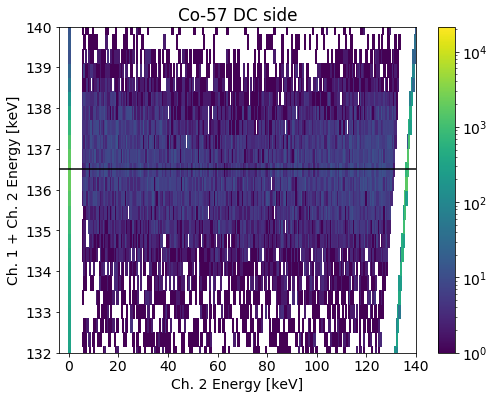

In [118]:
plt.figure()
#plt.scatter(single_list,sum_list)
plt.hist2d(single_list, sum_list, bins=(3000,11000), norm=mpl.colors.LogNorm(),cmap=plt.cm.viridis)
cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=12)

# plt.xlim(-4,128)
# plt.ylim(118,126)
# plt.axhline(y=122.1,color="k")

plt.xlim(-4,140)
plt.ylim(132,140)
plt.axhline(y=136.5,color="k")

plt.title("Co-57 DC side")#,fontsize=12)
plt.xlabel('Ch. 2 Energy [keV]')#,fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.ylabel('Ch. 1 + Ch. 2 Energy [keV]')#,fontsize=12);

In [119]:
# first, consider ch1 and ch2 (the middle two channels to avoid edge effect complications)
sum_list = []
single_list = []

energies_Cs137 = amp_to_keV(events_Cs137,ecal)

for event in energies_Cs137:
    if event[0] == 0. and event[3] == 0.:
        summed = np.sum(event)
        sum_list.append(summed)
        single_list.append(event[2])

Text(0, 0.5, 'Ch. 1 + Ch. 2 Energy [keV]')

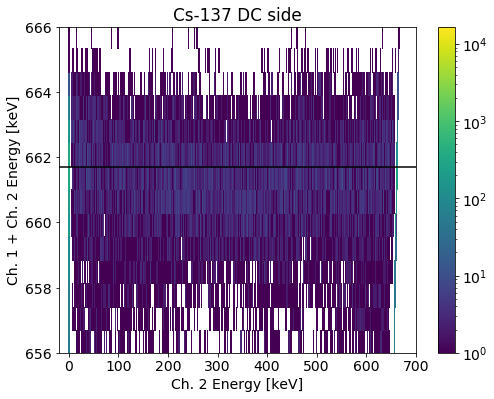

In [121]:
plt.figure()
#plt.scatter(single_list,sum_list)
plt.hist2d(single_list, sum_list, bins=(2500,6000), norm=mpl.colors.LogNorm(),cmap=plt.cm.viridis)
cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=12)
plt.xlim(-20,700)
plt.ylim(656,666)
plt.axhline(y=661.7,color="k")
plt.title("Cs-137 DC side")#,fontsize=12)
plt.xlabel('Ch. 2 Energy [keV]')#,fontsize=12)
plt.ylabel('Ch. 1 + Ch. 2 Energy [keV]')#,fontsize=12);

In [45]:
# consider ch0 and ch2
sum_list = []
single_list = []

energies = amp_to_keV(events,ecal)

for event in energies:
    if event[1] == 0. and event[3] == 0.:
        summed = np.sum(event)
        sum_list.append(summed)
        single_list.append(event[2])

Text(0, 0.5, 'Ch. 0 + Ch. 2 Energy [keV]')

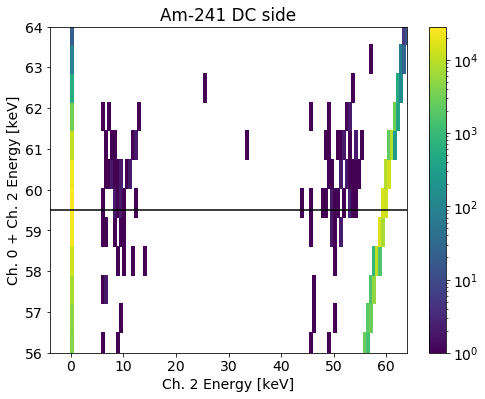

In [47]:

plt.figure()
#plt.scatter(single_list,sum_list)
plt.hist2d(single_list, sum_list, bins=(3000,3000), norm=mpl.colors.LogNorm(),cmap=plt.cm.viridis)
plt.colorbar()
#cbar.ax.tick_params(labelsize=12)
plt.xlim(-4,64)
plt.ylim(56,64)
plt.axhline(y=59.5,color="k")
plt.title("Am-241 DC side")#,fontsize=12)
plt.xlabel('Ch. 2 Energy [keV]')#,fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.ylabel('Ch. 0 + Ch. 2 Energy [keV]')#,fontsize=12);

# these middle events could be compton scattered events rather than charge sharing events

In [48]:
# consider ch0 and ch3
sum_list = []
single_list = []

energies = amp_to_keV(events,ecal)

for event in energies:
    if event[1] == 0. and event[2] == 0.:
        summed = np.sum(event)
        sum_list.append(summed)
        single_list.append(event[3])


Text(0, 0.5, 'Ch. 0 + Ch. 3 Energy [keV]')

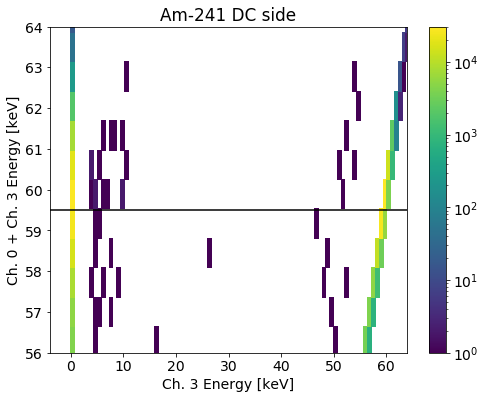

In [49]:
plt.figure()
#plt.scatter(single_list,sum_list)
plt.hist2d(single_list, sum_list, bins=(3000,3000), norm=mpl.colors.LogNorm(),cmap=plt.cm.viridis)
cbar = plt.colorbar()
#cbar.ax.tick_params(labelsize=12)
plt.xlim(-4,64)
plt.ylim(56,64)
plt.axhline(y=59.5,color="k")
plt.title("Am-241 DC side")#,fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.xlabel('Ch. 3 Energy [keV]')#,fontsize=12)
plt.ylabel('Ch. 0 + Ch. 3 Energy [keV]')#,fontsize=12);

### Plot distribution of charge across channels

In [92]:
def perc_energy_per_channel_f(energies,ecut=[0,5000]):
    """For each event, find the percent of total event energy found on each channel.
       Return lists of these percentages per channel. 
    Args:
        energies: [lists of energies on each of four channels per event]
        ecut (optional): specify acceptable range of energy summed over all channels. Default [0,5000] keV
    Returns:
        [perc_energy_ch0,perc_energy_ch1,perc_energy_ch2,perc_energy_ch3]
    """
    
#     width = 0
#     num_strips = np.array([1,2,3,4])
#     plt.figure(figsize=(8,6))
    emin = ecut[0]
    emax = ecut[1]
    
    perc_energy_ch0 = []
    perc_energy_ch1 = []
    perc_energy_ch2 = []
    perc_energy_ch3 = []

    for event_energies in energies:
        
#         # skip single-site events
#         if np.count_nonzero(event_energies) == 1:
#             continue

       # Select energy range only
        if not (np.sum(event_energies) >= emin and np.sum(event_energies) <= emax):
            continue

        perc_energy = np.round(100.*np.array(event_energies)/np.sum(event_energies),2)
        perc_energy_ch0.append(perc_energy[0])
        perc_energy_ch1.append(perc_energy[1])
        perc_energy_ch2.append(perc_energy[2])
        perc_energy_ch3.append(perc_energy[3])

    return [perc_energy_ch0,perc_energy_ch1,perc_energy_ch2,perc_energy_ch3]

(0, 250)

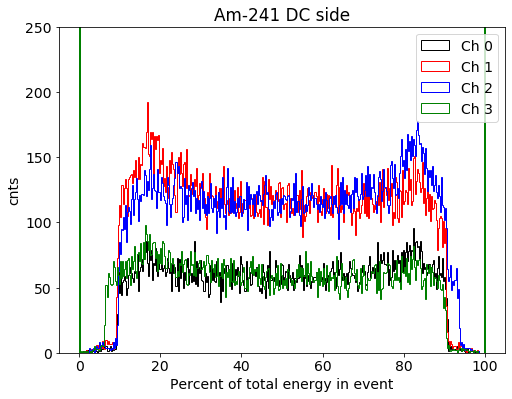

In [95]:
perc_energy_per_channel = perc_energy_per_channel_f(energies)

# Plot
num_bins = 400
# plt.hist(perc_energy_per_channel[0],bins=num_bins,density=True,histtype="step",label="Ch 0")
# plt.hist(perc_energy_per_channel[1],bins=num_bins,density=True,histtype="step",label="Ch 1")
# plt.hist(perc_energy_per_channel[2],bins=num_bins,density=True,histtype="step",label="Ch 2")
# plt.hist(perc_energy_per_channel[3],bins=num_bins,density=True,histtype="step",label="Ch 3")
plt.hist(perc_energy_per_channel[0],bins=num_bins,histtype="step",label="Ch 0")
plt.hist(perc_energy_per_channel[1],bins=num_bins,histtype="step",label="Ch 1")
plt.hist(perc_energy_per_channel[2],bins=num_bins,histtype="step",label="Ch 2")
plt.hist(perc_energy_per_channel[3],bins=num_bins,histtype="step",label="Ch 3")
plt.ylabel("cnts")#,fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.xlabel("Percent of total energy in event")#,fontsize=12)
plt.title("Am-241 DC side")#,fontsize=12)
plt.legend()#fontsize=12);
#plt.xlim(1,)
#plt.ylim(0,0.0012);
plt.ylim(0,250)

In [62]:
print(energies_Co57[:10])

[array([13.98448785,  0.        ,  0.        ,  0.        ]), array([121.54270581,   0.        ,   0.        ,   0.        ]), array([9.21567512, 0.        , 0.        , 0.        ]), array([15.40017526,  0.        ,  0.        ,  0.        ]), array([15.63407617,  0.        ,  0.        ,  0.        ]), array([115.89322616,   0.        ,   0.        ,   0.        ]), array([120.5134594,   0.       ,   0.       ,   0.       ]), array([30.15984049,  0.        ,  0.        ,  0.        ]), array([121.83283609,   0.        ,   0.        ,   0.        ]), array([79.32092586,  0.        ,  0.        ,  0.        ])]


In [102]:
perc_energy_per_channel = perc_energy_per_channel_f(energies_Co57)#,[132,140])

(0, 150)

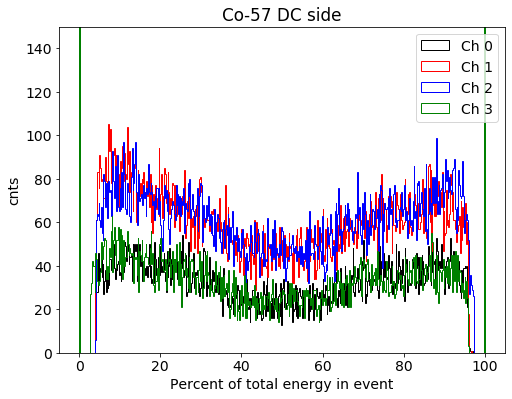

In [104]:
# Plot
num_bins = 500
# plt.hist(perc_energy_per_channel[0],bins=num_bins,density=True,histtype="step",label="Ch 0")
# plt.hist(perc_energy_per_channel[1],bins=num_bins,density=True,histtype="step",label="Ch 1")
# plt.hist(perc_energy_per_channel[2],bins=num_bins,density=True,histtype="step",label="Ch 2")
# plt.hist(perc_energy_per_channel[3],bins=num_bins,density=True,histtype="step",label="Ch 3")
plt.hist(perc_energy_per_channel[0],bins=num_bins,histtype="step",label="Ch 0")
plt.hist(perc_energy_per_channel[1],bins=num_bins,histtype="step",label="Ch 1")
plt.hist(perc_energy_per_channel[2],bins=num_bins,histtype="step",label="Ch 2")
plt.hist(perc_energy_per_channel[3],bins=num_bins,histtype="step",label="Ch 3")
plt.ylabel("cnts")#,fontsize=12)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.xlabel("Percent of total energy in event")#,fontsize=12)
plt.title("Co-57 DC side")#,fontsize=12)
plt.legend()#fontsize=12);
#plt.xlim(1,)
plt.ylim(0,150)
#plt.ylim(0,0.0025);

(0, 5000)

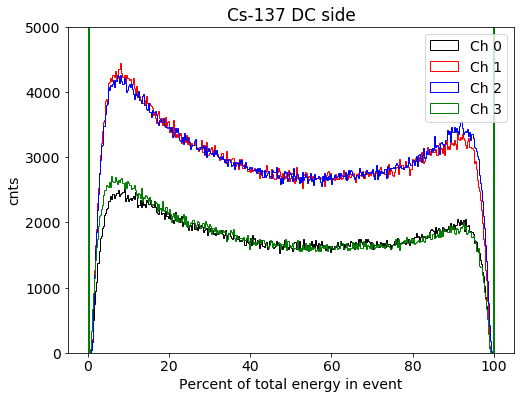

In [55]:
energies_Cs137 = amp_to_keV(events_Cs137,ecal)
perc_energy_per_channel = perc_energy_per_channel_f(energies_Cs137)

# Plot
num_bins = 400
# plt.hist(perc_energy_per_channel[0],bins=num_bins,density=True,histtype="step",label="Ch 0")
# plt.hist(perc_energy_per_channel[1],bins=num_bins,density=True,histtype="step",label="Ch 1")
# plt.hist(perc_energy_per_channel[2],bins=num_bins,density=True,histtype="step",label="Ch 2")
# plt.hist(perc_energy_per_channel[3],bins=num_bins,density=True,histtype="step",label="Ch 3")
plt.hist(perc_energy_per_channel[0],bins=num_bins,histtype="step",label="Ch 0")
plt.hist(perc_energy_per_channel[1],bins=num_bins,histtype="step",label="Ch 1")
plt.hist(perc_energy_per_channel[2],bins=num_bins,histtype="step",label="Ch 2")
plt.hist(perc_energy_per_channel[3],bins=num_bins,histtype="step",label="Ch 3")
plt.ylabel("cnts")#,fontsize=12)
plt.xticks()#fontsize=12)
plt.yticks()#fontsize=12)
plt.xlabel("Percent of total energy in event")#,fontsize=12)
plt.title("Cs-137 DC side")#,fontsize=12)
plt.legend()#fontsize=12);
#plt.xlim(1,)
plt.ylim(0,5000)